<a href="https://colab.research.google.com/github/MtHenriqueF/Pattern-classification/blob/main/patternClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##A célula de codigo a seguir está gerando 200 padrões aleatórios para uma distribuição normal multivariada.

##$$X \sim N(\mu_x, \Sigma) $$


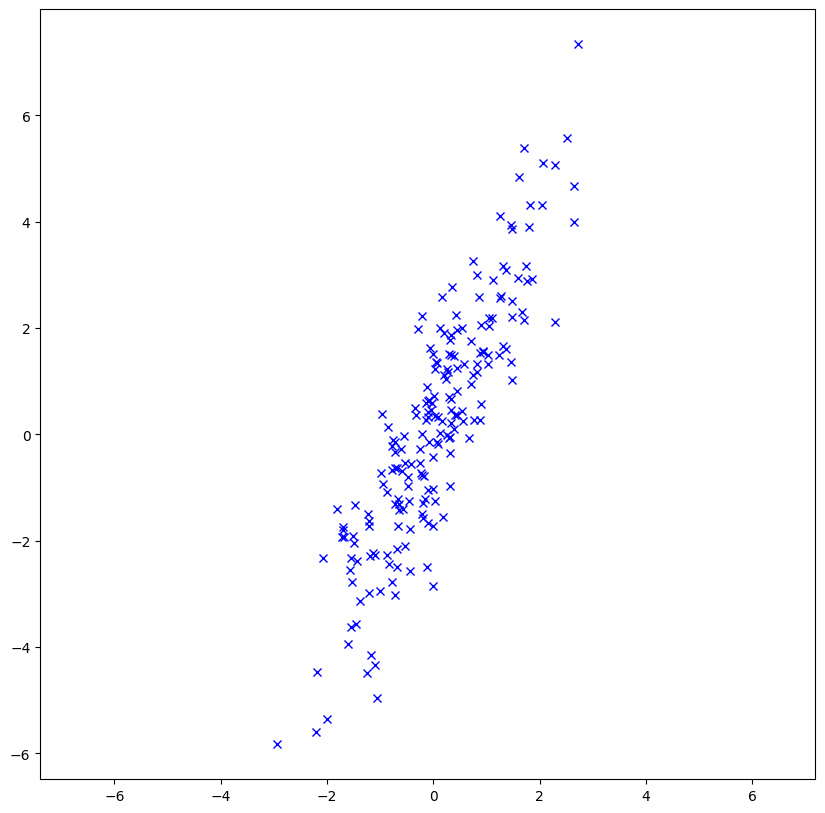

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
mu_x=[0, 0]
Sigma=[[1.1,2.1],[2.1,5]]

X = np.random.multivariate_normal(mu_x, Sigma, 200)

plt.figure(figsize = (10,10))
plt.plot(X[:,0], X[:,1],'xb')
plt.axis('equal')
plt.show()

---
##O código a seguir estima os valores do vetor de média e da matriz de covariância a partir da amostra X note a diferença em relação aos valores originais.

In [ ]:
S_x = np.cov(X.T)
m_x = np.mean(X,axis=0)

print('Media amostral\n', m_x,'\n')
print('Matriz de covariância amostral\n',S_x,'\n')

Media amostral
 [0.04359725 0.17283683] 

Matriz de covariância amostral
 [[1.13032108 2.13533528]
 [2.13533528 5.19424417]] 



---

## Estimação de $\mu$ e $ \Sigma $

- Gerarei as seguintes quantidades de padrão
(5, 50, 500, 5.000 e 50.000)

- Avaliarei a qualidade da estimação obtida

- $\mu = \{ 0,0\}$ e $\Sigma \begin{bmatrix}
1.1 & 2.1 \\
2.1 & 5
\end{bmatrix}$. Serão os valores reais

### Quais fórmulas serão usadas:

Médias estimadas:
$$ \hat{\mu} = \frac{1}{n} \sum_{k=1}^{n} x_k $$

<br>

Matriz de covariância estimada:

$$ \hat{\Sigma} = \frac{1}{n-1} \sum_{k=1}^{n} (x_k - \hat{\mu})(x_k - \hat{\mu})^t $$

OBS: para cálculo do erro usarei distância eucliadiana entre:

- O vetor de médias verdadeiro e o estimado:
$∥\hat{𝜇} - 𝜇_{true}∥$
- A matriz de covariância estimada e verdadeira: $∥\hat{\Sigma} - \Sigma_{true}∥$


In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42) #seed padrão de aleatoriedade
mi_true = np.array([0,0])
sigma_true = np.array([
    [1.1, 2.1],
    [2.1, 5]
])
results = []

samples = [5, 50, 500, 5000, 50000]
for n in samples:
  samples = np.random.multivariate_normal(mi_true, sigma_true, size=n)

  mi = np.mean(samples, axis=0) #media dos 2 atributos
  sigma = np.cov(samples.T) #sigma estimado

  mi_error = np.linalg.norm(mi - mi_true)
  sigma_error = np.linalg.norm(sigma - sigma_true)

  results.append({
      "numero de amostras":n,
      "media estimada": mi,
      "matriz de covariancia estimada": sigma,
      "erro da media": mi_error,
      "erro da matriz de covariancia": sigma_error
  })


df_results = pd.DataFrame([
    {
      "numero de amostras":r['numero de amostras'],
      "media estimada variavel 1": r['media estimada'][0],
      "media estimada variavel 2": r['media estimada'][1],
      "erro da media": r['erro da media'],
      "erro da matriz de covariancia": r["erro da matriz de covariancia"]
    }for r in results
    ])

covarience_matrixes = []
for r in results:
  covarience_matrixes.append(r["matriz de covariancia estimada"])


In [ ]:
df_results

,numero de amostras,media estimada variavel 1,media estimada variavel 2,erro da media,erro da matriz de covariancia
0,5,-0.586403,-0.816265,1.005065,2.072885
1,50,0.220175,0.359285,0.421381,1.581277
2,500,-0.072473,-0.130388,0.149175,0.330327
3,5000,0.016171,0.030076,0.034148,0.068659
4,50000,-0.006536,-0.017931,0.019085,0.073786


In [ ]:
for i, covarience_matrix in enumerate(covarience_matrixes):
  print(f" Matriz de covarianca -> {df_results['numero de amostras'][i]} amostras")
  print(covarience_matrix)
  print()

 Matriz de covarianca -> 5 amostras
[[0.8778643  1.55066209]
 [1.55066209 3.09108258]]

 Matriz de covarianca -> 50 amostras
[[0.83580304 1.52926247]
 [1.52926247 3.66615024]]

 Matriz de covarianca -> 500 amostras
[[1.01392372 1.94594192]
 [1.94594192 4.76710725]]

 Matriz de covarianca -> 5000 amostras
[[1.10733498 2.12267484]
 [2.12267484 5.06026547]]

 Matriz de covarianca -> 50000 amostras
[[1.11277874 2.13011561]
 [2.13011561 5.05888269]]



---
##A célula de codigo a seguir está gerando 200 padrões aleatórios para duas distribuições normais multivariadas.

##$$X \sim N(\mu_x, \Sigma)\quad \textrm{e} \quad Y \sim N(\mu_y, \Sigma)$$



### Na célula de código a seguir as matrizes X (em preto no gráfico) e Y (apresentada em vermelho no gráfico) correspondem a duas amostras contendo 200 padrões cada das distribuições normais multivariada acima. Observe estas amostras no gráfico abaixo.

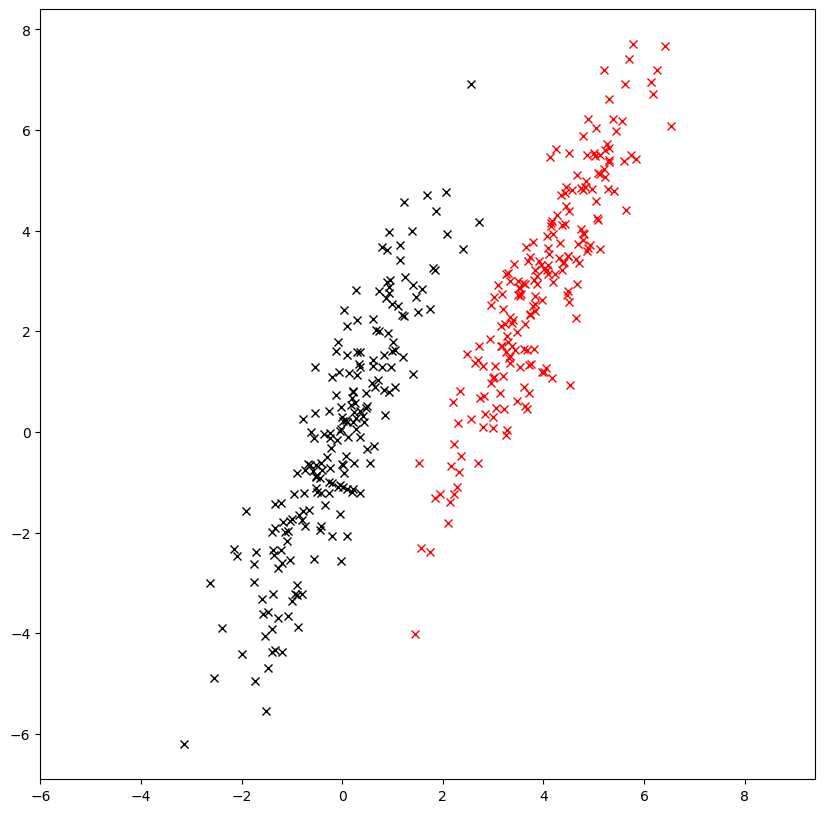

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
mu_x= np.array([0, 0])
mu_y= np.array([4, 3])
Sigma= np.array([[1.1,2.1],
       [2.1,5]])

X = np.random.multivariate_normal(mu_x, Sigma, 200)
Y = np.random.multivariate_normal(mu_y, Sigma, 200)

plt.figure(figsize = (10,10))
plt.plot(X[:,0], X[:,1],'xk')
plt.plot(Y[:,0], Y[:,1],'xr')
plt.axis('equal')
plt.show()

---
##Estimação de $ \mu $ e $ \Sigma $ para as amostras X e Y. Em seguida, utilizando probabilidades a priori iguais para ambas as classes, descobrirei a fronteira de decisão usando classificador Baysiano.

$$
P(\omega_i | \mathbf{x}) = \frac{p(\mathbf{x} | \omega_i) P(\omega_i)}{p(\mathbf{x})}
$$

- Probabilidade a priori: $P(\omega_i)$
- Função densidadede probabilidade classe condicional: $p(\mathbf{x} | \omega_i)$
- Função densidade de probabilidade conjunta: probabilidade de se encontrar um padr ̃ao como este independentemente da classe: $p(x)$

Fronteira de decisão ocorre quando as probabilidades a posteriori são iguais:

$$
\frac{p(\mathbf{x} | \omega_1) P(\omega_1)}{p(\mathbf{x})} = \frac{p(\mathbf{x} | \omega_2) P(\omega_2)}{p(\mathbf{x})}
$$

=

$$
p(\mathbf{x} | \omega_1) P(\omega_1) = p(\mathbf{x} | \omega_2) P(\omega_2)
$$

Sabemos que $P(ω_1) = P(ω_2)$, portanto, só iremos nos preocupar com $p(\mathbf{x} | \omega_i)$:

<br>

$p(\mathbf{x} | \omega_i) = \frac{1}{(2\pi)^{d/2}|\Sigma_i|^{1/2}} \exp\left(-\frac{1}{2}(\mathbf{x}-\mu_i)^T \Sigma_i^{-1} (\mathbf{x}-\mu_i)\right)$

<br>

aplicando $\ln$:

$\ln(p(\mathbf{x} | \omega_i)) = -\frac{1}{2}(\mathbf{x}-\mu_i)^T \Sigma_i^{-1} (\mathbf{x}-\mu_i) - \frac{d}{2}\ln(2\pi) - \frac{1}{2}\ln(|\Sigma_i|)$

<br>

Covariâncias iguais ($\Sigma_1=\Sigma_2=\Sigma$), os termos constantes envolvendo o determinante $|\Sigma|$ e $2\pi$ também se cancelam:

$$
-\frac{1}{2}(\mathbf{x}-\mu_1)^T \Sigma^{-1} (\mathbf{x}-\mu_1) = -\frac{1}{2}(\mathbf{x}-\mu_2)^T \Sigma^{-1} (\mathbf{x}-\mu_2)
$$ = $$
(\mathbf{x}-\mu_1)^T \Sigma^{-1} (\mathbf{x}-\mu_1) = (\mathbf{x}-\mu_2)^T \Sigma^{-1} (\mathbf{x}-\mu_2)
$$


Distribuindo:


$$
\mathbf{x}^T\Sigma^{-1}\mathbf{x} - 2\mu_1^T\Sigma^{-1}\mathbf{x} + \mu_1^T\Sigma^{-1}\mu_1 = \mathbf{x}^T\Sigma^{-1}\mathbf{x} - 2\mu_2^T\Sigma^{-1}\mathbf{x} + \mu_2^T\Sigma^{-1}\mu_2
$$

O termo quadrático $\mathbf{x}^T\Sigma^{-1}\mathbf{x}$ é idêntico em ambos os lados e se anula.

Reorganizando a equação para isolar os termos com $\mathbf{x}$:
$$
2\mu_2^T\Sigma^{-1}\mathbf{x} - 2\mu_1^T\Sigma^{-1}\mathbf{x} = \mu_2^T\Sigma^{-1}\mu_2 - \mu_1^T\Sigma^{-1}\mu_1
$$

O que resulta na forma final da fronteira de decisão linear:
$$
2(\mu_2 - \mu_1)^T \Sigma^{-1} \mathbf{x} = \mu_2^T \Sigma^{-1} \mu_2 - \mu_1^T \Sigma^{-1} \mu_1
$$

Esta é uma equação da forma $\mathbf{w}^T\mathbf{x} = c$


- $w = 2(\mu_2 - \mu_1)\Sigma^{-1}$
- $c =\mu_2^T \Sigma^{-1} \mu_2 - \mu_1^T \Sigma^{-1} \mu_1
$

Como $\mathbf{w}$ e $\mathbf{x}$ são vetores coluna com os componentes $w_1, w_2$ e $x, y$, podemos escrever a equação da fronteira de decisão como:


$w_1 x + w_2 y = c$


Resolvendo para $y$:

$y = -\frac{w_1}{w_2} x + \frac{c}{w_2}$

Essa é a forma explícita da **equação de uma reta** no plano 2D, que representa a fronteira de decisão Bayesiana sob hipótese de covariâncias iguais.




Valores Verdadeiros:
mu_x: [0 0]
mu_y: [4 3]
Sigma:
[[1.1 2.1]
 [2.1 5. ]]

Valores Estimados:
mu_hat_x: [-0.08148301 -0.14933718]
mu_hat_y: [3.95876586 2.90600795]
Sigma_hat_pooled:
[[1.08085498 2.09683717]
 [2.09683717 5.06819528]]

Gráfico 'decision_boundary_plot.png' gerado com sucesso.


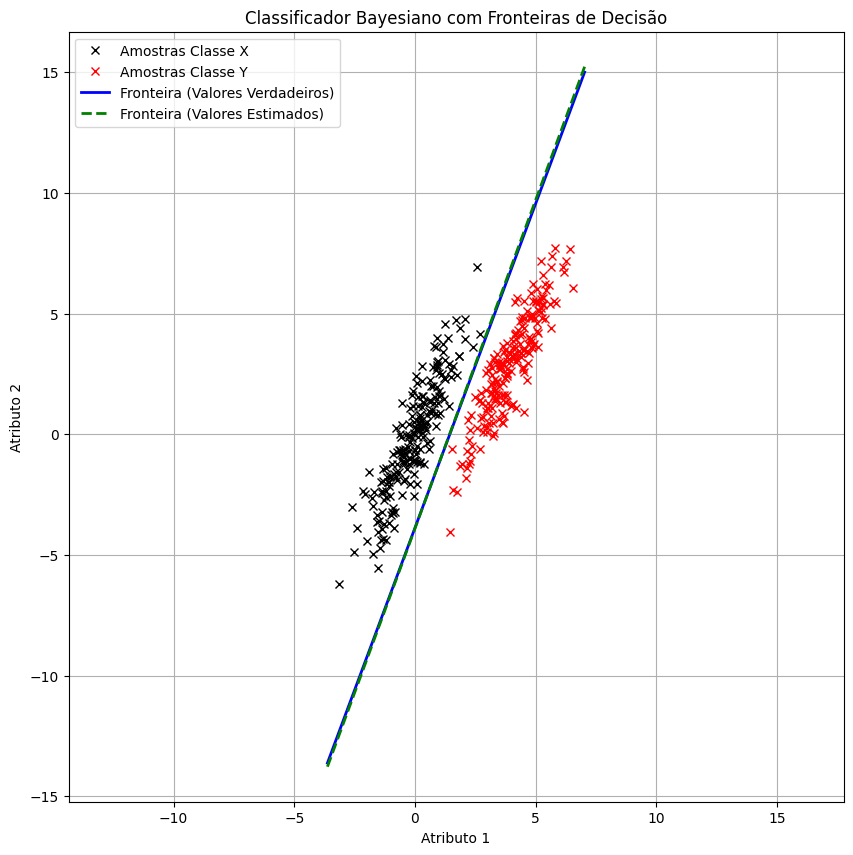

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


mu_hat_x = np.mean(X, axis=0)
mu_hat_y = np.mean(Y, axis=0)

Sigma_hat_x = np.cov(X, rowvar=False)
Sigma_hat_y = np.cov(Y, rowvar=False)

Sigma_hat_pooled = (Sigma_hat_x + Sigma_hat_y) / 2

print("Valores Verdadeiros:")
print(f"mu_x: {mu_x}")
print(f"mu_y: {mu_y}")
print(f"Sigma:\n{Sigma}\n")

print("Valores Estimados:")
print(f"mu_hat_x: {mu_hat_x}")
print(f"mu_hat_y: {mu_hat_y}")
print(f"Sigma_hat_pooled:\n{Sigma_hat_pooled}\n")

def calculate_decision_boundary(mu1, mu2, Sigma):
    """Calcula os parâmetros da linha de decisão x2 = m*x1 + b."""
    Sigma_inv = np.linalg.inv(Sigma)
    w = Sigma_inv @ (mu2 - mu1)

    c = mu2.T @ Sigma_inv @ mu2 - mu1.T @ Sigma_inv @ mu1
    m = -w[0] / w[1]
    b = c / (2 * w[1])
    return m, b

m_true, b_true = calculate_decision_boundary(mu_x, mu_y, Sigma)

m_est, b_est = calculate_decision_boundary(mu_hat_x, mu_hat_y, Sigma_hat_pooled)

plt.figure(figsize=(10, 10))
plt.plot(X[:, 0], X[:, 1], 'x', color='black', label='Amostras Classe X')
plt.plot(Y[:, 0], Y[:, 1], 'x', color='red', label='Amostras Classe Y')

x_min, x_max = plt.xlim()
plot_x = np.linspace(x_min, x_max, 100)

plot_y_true = m_true * plot_x + b_true
plot_y_est = m_est * plot_x + b_est

plt.plot(plot_x, plot_y_true, '-', color='blue', linewidth=2, label='Fronteira (Valores Verdadeiros)')
plt.plot(plot_x, plot_y_est, '--', color='green', linewidth=2, label='Fronteira (Valores Estimados)')

plt.axis('equal')
plt.title('Classificador Bayesiano com Fronteiras de Decisão')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.legend()
plt.grid(True)
plt.savefig("decision_boundary_plot.png")

print("Gráfico 'decision_boundary_plot.png' gerado com sucesso.")

---

---
## Desenhando o gráfico da fronteira de decisão para as 2 classes anteriores usando os valores verdadeiros de $\mu$ e $\Sigma$ variando os valores das probabilidades a priori, trace as fronteiras de decisão para a probabilidade a priori $P(X)$ igual a $\{0.2, 0.4, 0.6 \, \textrm{e} \, 0.8\}$.

### Explicação algébrica

Considerando a probabilidade a priori temos:

- $P(w_1) = P(X)$
- $P(w_2) = 1 - P(X)$

<br>

E sabemos que a froteira de decisão ocorre quando:
$p(x|w_1)P(w_1) = p(x|w_2)P(w_2)$

<br>

aplicando $\ln$:

$\ln(p(x|w_1)P(w_1)) = \ln(p(x|w_2)P(w_2)$)

 =

$\ln(p(x|w_1) + \ln(P(w_1)))$ = $\ln(p(x|w_2) + \ln(P(w_2)))$

<br>

Usando a forma Gaussiana (com covariâncias iguais):

$$
\ln p(\mathbf{x} | \omega_i) = -\frac{1}{2} (\mathbf{x} - \mu_i)^T \Sigma^{-1} (\mathbf{x} - \mu_i) - \frac{d}{2}\ln(2\pi) - \frac{1}{2}\ln |\Sigma|
$$

Os termos constantes se cancelam quando subtrairmos os dois lados. Assim:

$$
-\frac{1}{2}(\mathbf{x} - \mu_1)^T \Sigma^{-1} (\mathbf{x} - \mu_1) + \ln P(\omega_1) = -\frac{1}{2}(\mathbf{x} - \mu_2)^T \Sigma^{-1} (\mathbf{x} - \mu_2) + \ln P(\omega_2)
$$

<br>

Isolando os termos com $\mathbf{x}$:

$$
(\mathbf{x} - \mu_1)^T \Sigma^{-1} (\mathbf{x} - \mu_1) - (\mathbf{x} - \mu_2)^T \Sigma^{-1} (\mathbf{x} - \mu_2) = 2 \ln \frac{P(\omega_2)}{P(\omega_1)}
$$

<br>

Expandindo:

$$
\mathbf{x}^T \Sigma^{-1} \mathbf{x} - 2\mu_1^T \Sigma^{-1} \mathbf{x} + \mu_1^T \Sigma^{-1} \mu_1 - \left[\mathbf{x}^T \Sigma^{-1} \mathbf{x} - 2\mu_2^T \Sigma^{-1} \mathbf{x} + \mu_2^T \Sigma^{-1} \mu_2\right] = 2 \ln \frac{P(\omega_2)}{P(\omega_1)}
$$

<br>

Os termos quadráticos em $\mathbf{x}$ se cancelam:

$$
-2\mu_1^T \Sigma^{-1} \mathbf{x} + 2\mu_2^T \Sigma^{-1} \mathbf{x} = \mu_2^T \Sigma^{-1} \mu_2 - \mu_1^T \Sigma^{-1} \mu_1 + 2 \ln \frac{P(\omega_2)}{P(\omega_1)}
$$

<br>

Reorganizando:

$$
2(\mu_2 - \mu_1)^T \Sigma^{-1} \mathbf{x} = \mu_2^T \Sigma^{-1} \mu_2 - \mu_1^T \Sigma^{-1} \mu_1 + 2 \ln \frac{P(\omega_2)}{P(\omega_1)}
$$

<br>

Essa é a forma final da **fronteira de decisão com priors diferentes**:

$$
\mathbf{w}^T \mathbf{x} = c'
$$

onde

$$
\mathbf{w} = 2 \Sigma^{-1} (\mu_2 - \mu_1)
$$

$$
c' = \mu_2^T \Sigma^{-1} \mu_2 - \mu_1^T \Sigma^{-1} \mu_1 + 2 \ln \frac{P(\omega_2)}{P(\omega_1)}
$$

---

#### Forma de reta em 2D

Como $\mathbf{w}$ e $\mathbf{x}$ são vetores coluna com componentes $w_1, w_2$ e $x, y$, podemos escrever:

$$
w_1 x + w_2 y = c'
$$

Resolvendo para $y$:

$$
y = -\frac{w_1}{w_2} x + \frac{c'}{w_2}
$$

Essa é a **equação de uma reta** no plano 2D, onde **o termo com o log das probabilidades a priori** desloca a reta, mudando a fronteira de decisão conforme a escolha de $P(\omega_1)$ e $P(\omega_2)$.



### Aplicando a algebra em python:

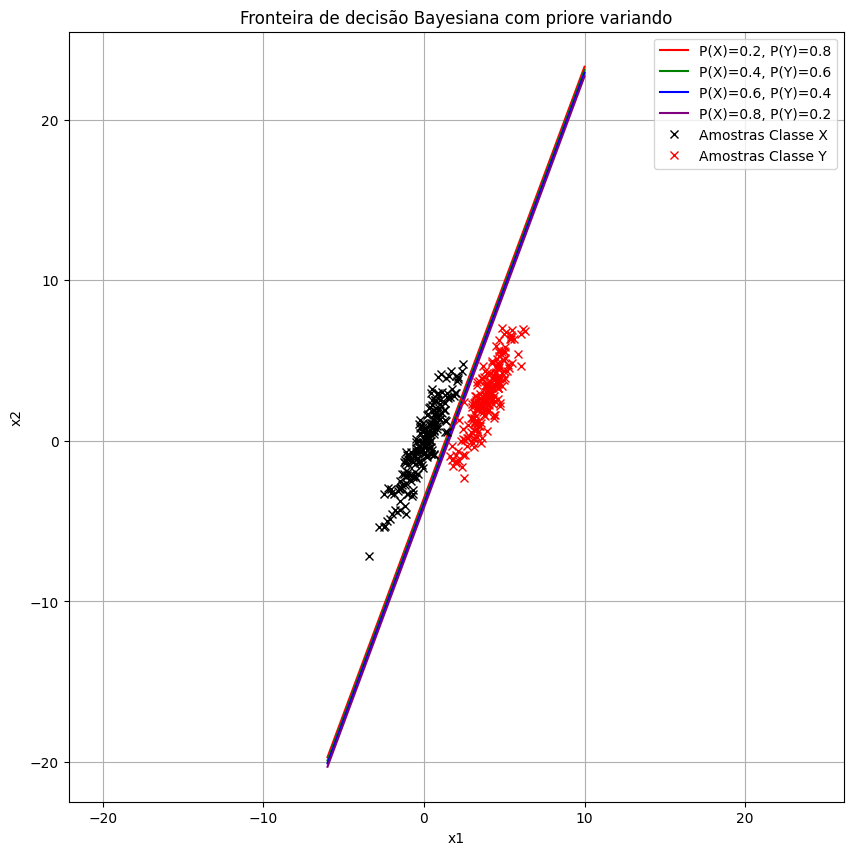

In [ ]:
mu_x= np.array([0, 0])
mu_y= np.array([4, 3])
Sigma= np.array([[1.1,2.1],
       [2.1,5]])

X = np.random.multivariate_normal(mu_x, Sigma, 200)
Y = np.random.multivariate_normal(mu_y, Sigma, 200)

Sigma_inv = np.linalg.inv(Sigma)

w = 2 * (Sigma_inv @ (mu_y - mu_x))

#não considera ainda 2ln(p(w1)/p(w2))
c_line_without_log_term = mu_y.T @ Sigma_inv @ mu_y - mu_x.T @ Sigma_inv @ mu_x

priors_X = [0.2, 0.4, 0.6, 0.8]

plt.figure(figsize=(10, 10))

#cores para a plotagem
colors = ['r', 'g', 'b', 'purple']

x_boundary = np.linspace(-6, 10, 200)

for prior_X, color in zip(priors_X, colors):
  prior_Y = 1 - prior_X

  # 2ln(p(w1)/p(w2))
  logn = 2 * np.log(prior_X / prior_Y)
  c_line_lnTerm = c_line_without_log_term + logn

  #y = -x* (w1/w2) + c'/w2
  y_boundary = (-w[0]/w[1]) * x_boundary + c_line_lnTerm / w[1]

  plt.plot(x_boundary, y_boundary, color=color, label=f"P(X)={prior_X:.1f}, P(Y)={prior_Y:.1f}")


plt.plot(X[:, 0], X[:, 1], 'x', color='black', label='Amostras Classe X')
plt.plot(Y[:, 0], Y[:, 1], 'x', color='red', label='Amostras Classe Y')

plt.title("Fronteira de decisão Bayesiana com priore variando")

plt.xlabel("x1")
plt.ylabel("x2")

plt.legend()
plt.grid(True)
plt.axis('equal')

plt.show()





#### Limitando os eixos para deixar mais legível:

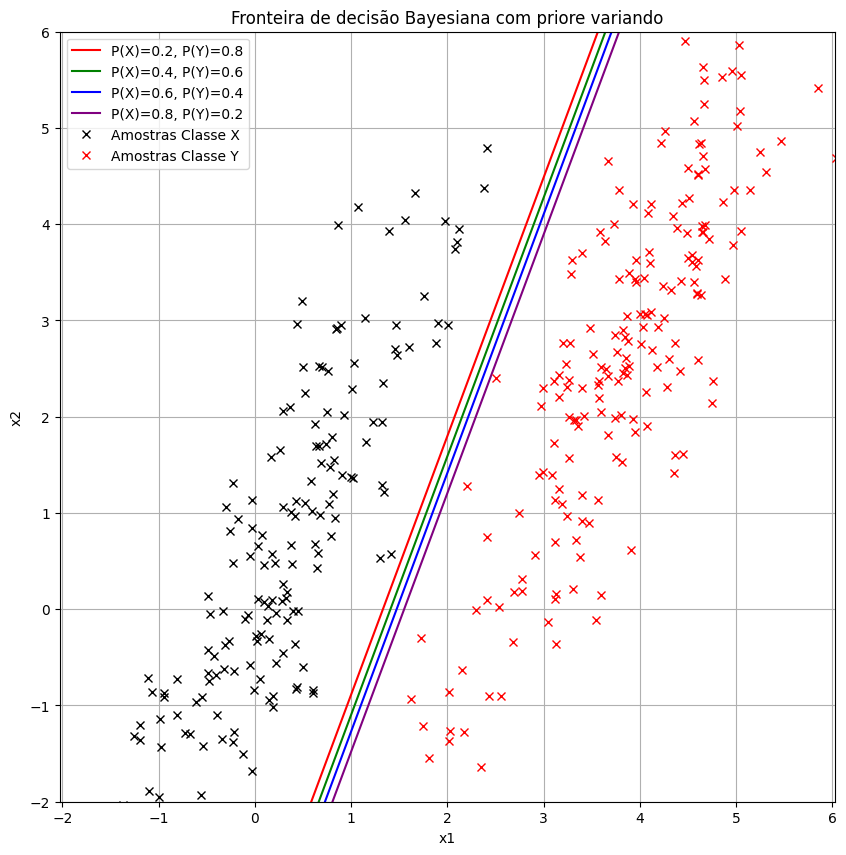

In [ ]:
plt.figure(figsize=(10, 10))


for prior_X, color in zip(priors_X, colors):
  prior_Y = 1 - prior_X

  # 2ln(p(w1)/p(w2))
  logn = 2 * np.log(prior_X / prior_Y)
  c_line_lnTerm = c_line_without_log_term + logn

  #y = -x* (w1/w2) + c'/w2
  y_boundary = (-w[0]/w[1]) * x_boundary + c_line_lnTerm / w[1]

  plt.plot(x_boundary, y_boundary, color=color, label=f"P(X)={prior_X:.1f}, P(Y)={prior_Y:.1f}")


plt.plot(X[:, 0], X[:, 1], 'x', color='black', label='Amostras Classe X')
plt.plot(Y[:, 0], Y[:, 1], 'x', color='red', label='Amostras Classe Y')

plt.title("Fronteira de decisão Bayesiana com priore variando")

plt.xlabel("x1")
plt.ylabel("x2")

plt.legend()
plt.grid(True)
plt.axis('equal')

##Limite nos eixos so para aumentar o zoom
plt.xlim(-2, 6)
plt.ylim(-2, 6)

plt.show()


Posição da fronteira:
Quando P(X) é baixo o modelo favorece Y e a fronteira fica mais próxima de X (menor região para X).

---
##Projeção das amostras X e Y na primeira PCA e fronteira de decisão do classficador Bayesiano usando as probabilidades a priori iguais a 0.5




In [ ]:
dataset = np.vstack((X, Y))
mean = np.mean(dataset, axis=0)

data_centered = dataset - mean

cov_matrix = np.cov(data_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
pc1 = eigenvectors[:, np.argmax(eigenvalues)]

X_projected = (X- mean) @ pc1
Y_projected = (Y- mean) @ pc1

mu_x_reduced = np.mean(X_projected)
mu_y_reduced = np.mean(Y_projected)

decision_boundary = (mu_x_reduced + mu_y_reduced) / 2

print(f"Média da Classe X projetada em 1D: {mu_x_reduced:.2f}")
print(f"Média da Classe Y projetada em 1D: {mu_y_reduced:.2f}")
print(f"Fronteira de Decisão Bayesiana em 1D (x_pca): {decision_boundary:.2f}")


Média da Classe X projetada em 1D: -2.37
Média da Classe Y projetada em 1D: 2.37
Fronteira de Decisão Bayesiana em 1D (x_pca): -0.00


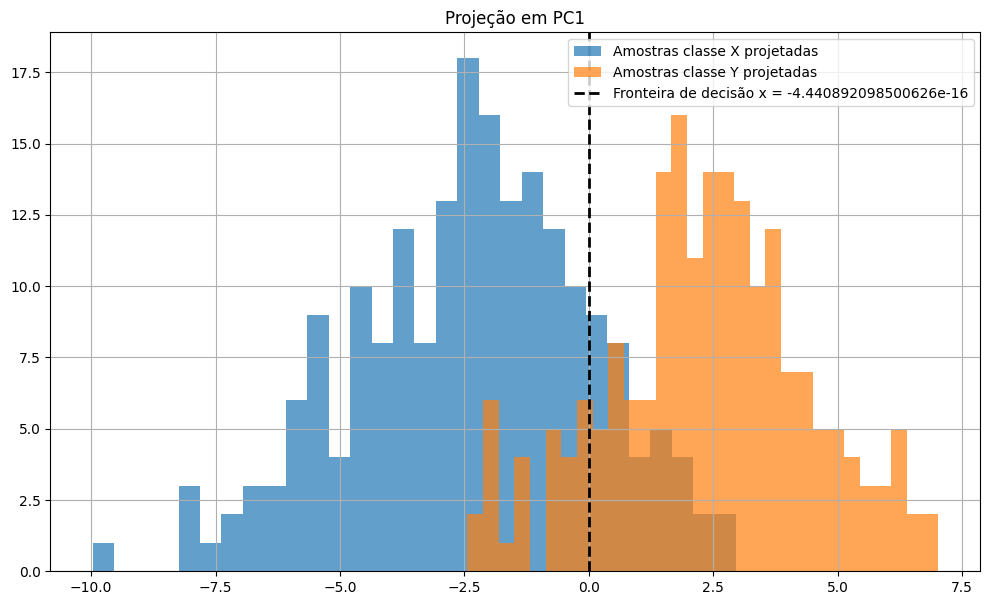

In [ ]:
plt.figure(figsize=(12, 7))

plt.hist(X_projected, bins=30, alpha=0.7, label='Amostras classe X projetadas')
plt.hist(Y_projected, bins=30, alpha=0.7, label='Amostras classe Y projetadas')

plt.axvline(decision_boundary, color='k', linestyle='--', linewidth=2, label=f'Fronteira de decisão x = {decision_boundary}')

plt.title('Projeção em PC1')

# plt.xlabel('Primeira componente')
plt.legend()
plt.grid(True)
plt.show()


#### Resultado:

O gráfico mostra o histograma das 2 classes após o PCA.
A fronteira de decisão como esperado se localiza exatamente no meio das 2 distribuições (mínimo erro).

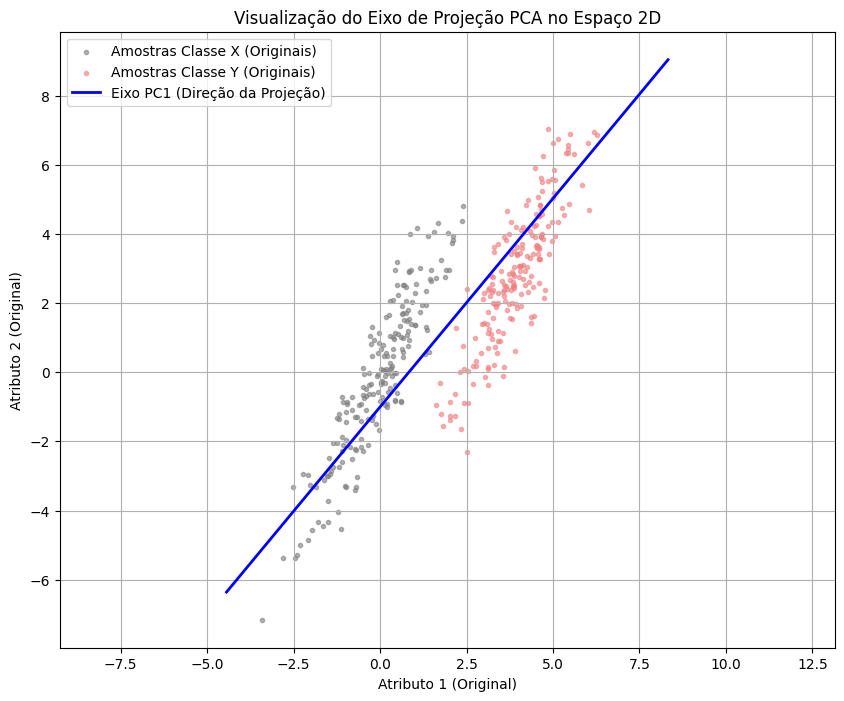

In [ ]:
plt.figure(figsize=(10, 8))

plt.scatter(X[:, 0], X[:, 1], marker='.', color='gray', alpha=0.6, label='Amostras Classe X (Originais)')
plt.scatter(Y[:, 0], Y[:, 1], marker='.', color='lightcoral', alpha=0.6, label='Amostras Classe Y (Originais)')

arrow_end = mean + 10 * pc1
arrow_start = mean - 10 * pc1
plt.plot([arrow_start[0], arrow_end[0]], [arrow_start[1], arrow_end[1]], color='blue', linewidth=2, label='Eixo PC1 (Direção da Projeção)')

plt.title('Visualização do Eixo de Projeção PCA no Espaço 2D')
plt.xlabel('Atributo 1 (Original)')
plt.ylabel('Atributo 2 (Original)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

O gráfico mostra uma visualização da redução. Antes tinhamos uma distribuição 2D. Com pca colocamos os dados no eixo PC1 que pode ser visualizado acima.

---
##Projeção das amostras X e Y em LD1 usando a projeção LDA e fronteira de decisão do classficador Bayesiano usando as probabilidades a priori iguais a 0.5




Média da classe X em LDA: 0.1250194399309885
Média da classe Y em LDA: 19.056001259935957
Fronteira de decisão LDA: 9.590510349933473


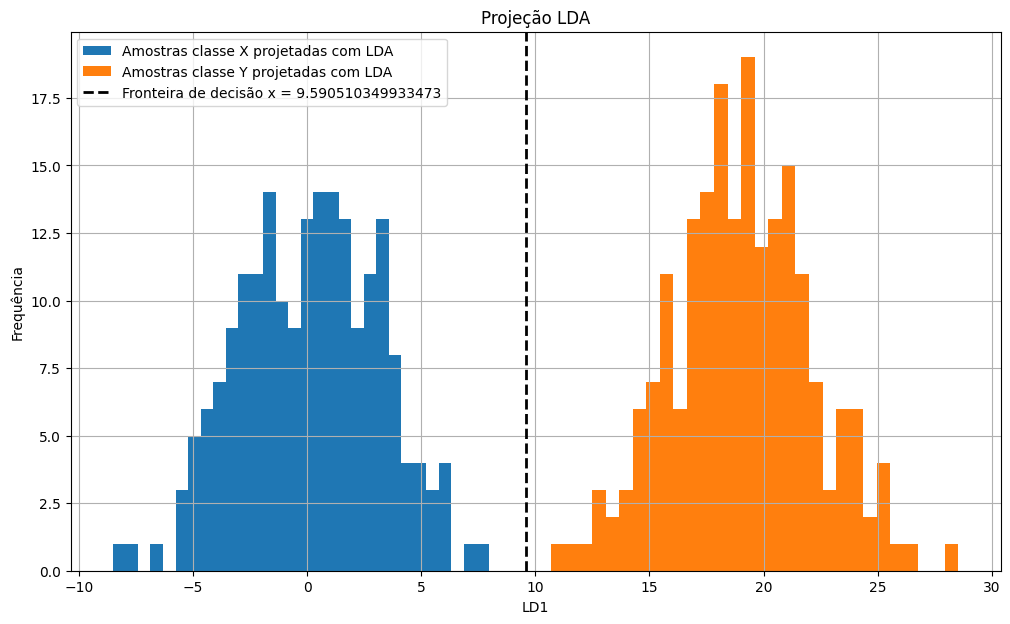

In [ ]:
mu_x_hat = np.mean(X, axis=0)
mu_y_hat = np.mean(Y, axis=0)

cov_x = np.cov(X, rowvar=False)
cov_y = np.cov(Y, rowvar=False)

Sw = cov_x + cov_y
Sw_inv = np.linalg.inv(Sw)
w = Sw_inv @ (mu_y_hat - mu_x_hat)

X_projected_lda = X @ w
Y_projected_lda = Y @ w

mu_x_lda = np.mean(X_projected_lda)
mu_y_lda = np.mean(Y_projected_lda)

decision_boundary_lda = (mu_x_lda + mu_y_lda) / 2

print(f"Média da classe X em LDA: {mu_x_lda}")
print(f"Média da classe Y em LDA: {mu_y_lda}")
print(f"Fronteira de decisão LDA: {decision_boundary_lda}")

plt.figure(figsize=(12, 7))

plt.hist(X_projected_lda, bins=30, label="Amostras classe X projetadas com LDA")
plt.hist(Y_projected_lda, bins=30, label="Amostras classe Y projetadas com LDA")
plt.axvline(decision_boundary_lda, color='k', linestyle='--', linewidth=2, label=f'Fronteira de decisão x = {decision_boundary_lda}')

plt.xlabel("LD1")
plt.ylabel("Frequência")
plt.title("Projeção LDA")


plt.legend()
plt.grid(True)
plt.show()



In [ ]:
X_projected_pca = (X - mean) @ pc1
Y_projected_pca = (Y - mean) @ pc1

X_projected_lda = X @ w
Y_projected_lda = Y @ w



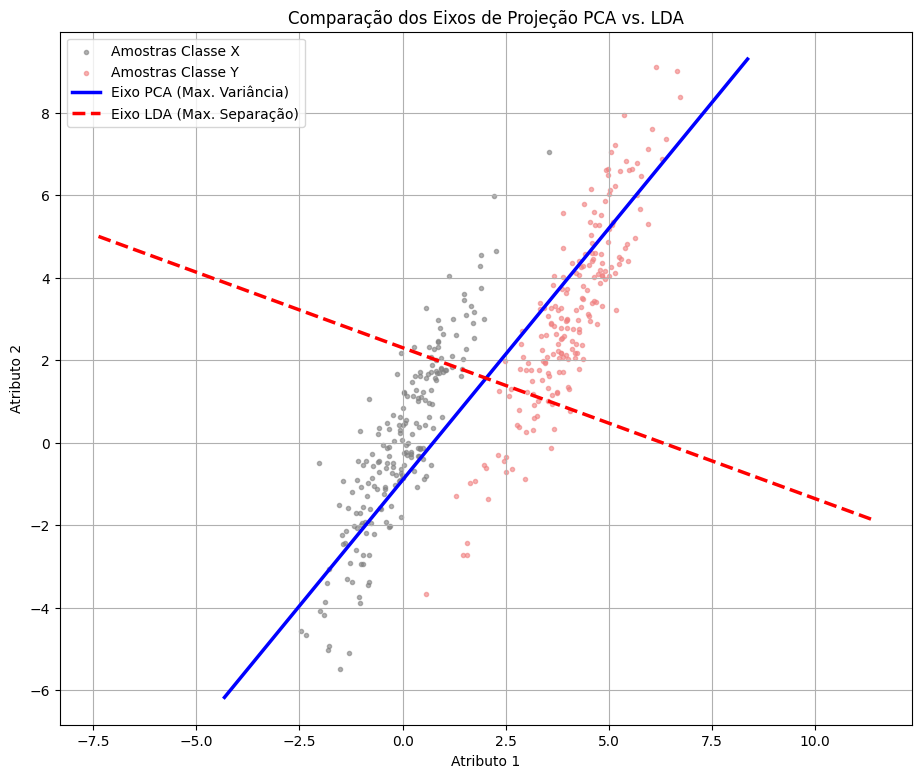

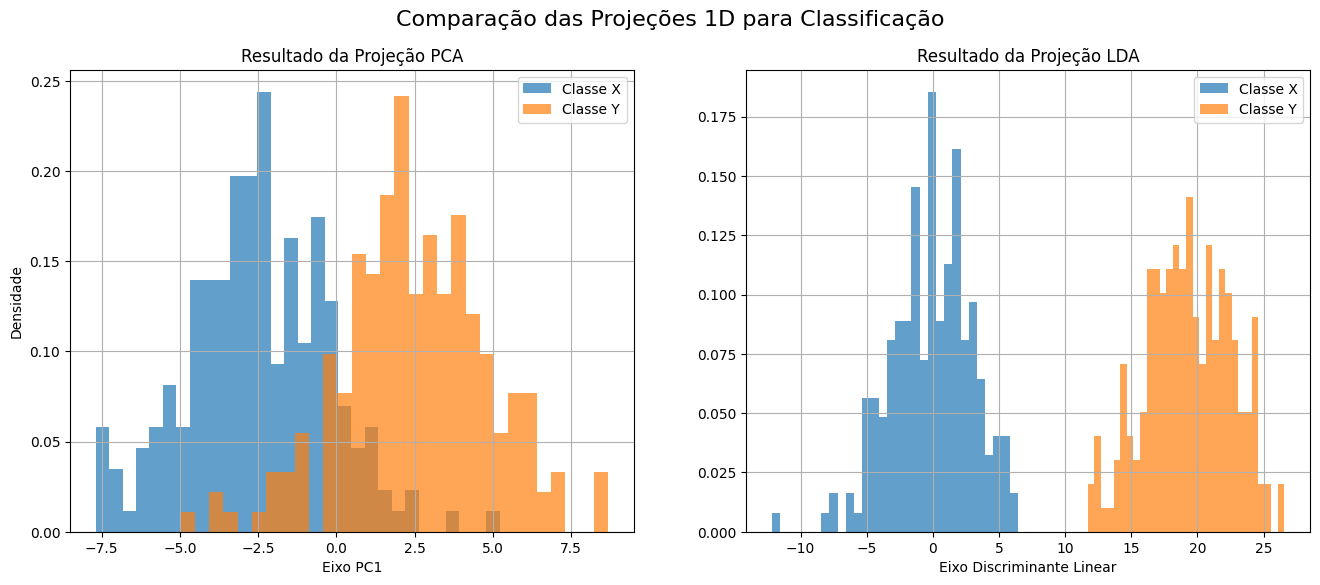

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

dataset = np.vstack((X, Y))
mean_pca = np.mean(dataset, axis=0)

data_centered = dataset - mean_pca
cov_matrix = np.cov(data_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

pc1_vector = eigenvectors[:, np.argmax(eigenvalues)]


mu_x_lda = np.mean(X, axis=0)
mu_y_lda = np.mean(Y, axis=0)
cov_x_lda = np.cov(X, rowvar=False)
cov_y_lda = np.cov(Y, rowvar=False)

Sw = cov_x_lda + cov_y_lda
Sw_inv = np.linalg.inv(Sw)

w_lda_vector = Sw_inv @ (mu_y_lda - mu_x_lda)


plt.figure(figsize=(11, 9))

#Plot dos dados originais
plt.scatter(X[:, 0], X[:, 1], marker='.', color='gray', alpha=0.6, label='Amostras Classe X')
plt.scatter(Y[:, 0], Y[:, 1], marker='.', color='lightcoral', alpha=0.6, label='Amostras Classe Y')

pc1_unit = pc1_vector / np.linalg.norm(pc1_vector)
w_lda_unit = w_lda_vector / np.linalg.norm(w_lda_vector)
scale = 10

#Plot do eixo PCA (azul)
plt.plot([mean_pca[0] - scale * pc1_unit[0], mean_pca[0] + scale * pc1_unit[0]],
         [mean_pca[1] - scale * pc1_unit[1], mean_pca[1] + scale * pc1_unit[1]],
         color='blue', linestyle='-', linewidth=2.5, label='Eixo PCA (Max. Variância)')

#Plot do eixo LDA (vermelho)
plt.plot([mean_pca[0] - scale * w_lda_unit[0], mean_pca[0] + scale * w_lda_unit[0]],
         [mean_pca[1] - scale * w_lda_unit[1], mean_pca[1] + scale * w_lda_unit[1]],
         color='red', linestyle='--', linewidth=2.5, label='Eixo LDA (Max. Separação)')

plt.title('Comparação dos Eixos de Projeção PCA vs. LDA')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


X_projected_pca = (X - mean_pca) @ pc1_vector
Y_projected_pca = (Y - mean_pca) @ pc1_vector
X_projected_lda = X @ w_lda_vector
Y_projected_lda = Y @ w_lda_vector

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

#Plot da Projeção PCA
ax1.hist(X_projected_pca, bins=30, alpha=0.7, label='Classe X', density=True)
ax1.hist(Y_projected_pca, bins=30, alpha=0.7, label='Classe Y', density=True)
ax1.set_title('Resultado da Projeção PCA')
ax1.set_xlabel('Eixo PC1')
ax1.set_ylabel('Densidade')
ax1.legend()
ax1.grid(True)

#Plot da Projeção LDA
ax2.hist(X_projected_lda, bins=30, alpha=0.7, label='Classe X', density=True)
ax2.hist(Y_projected_lda, bins=30, alpha=0.7, label='Classe Y', density=True)
ax2.set_title('Resultado da Projeção LDA')
ax2.set_xlabel('Eixo Discriminante Linear')
ax2.legend()
ax2.grid(True)

fig.suptitle('Comparação das Projeções 1D para Classificação', fontsize=16)
plt.show()

### Análise sobre os resultados

Podemos ver que a fronteira de decisão com LDA foi bem melhor, o que é esperado visto que estamos treinando um modelo supervisionado e usamos uma técnica de redução de dimensionalidade supervisionada (LDA) enquanto PCA é não supervisionada (é mais preferível usa-la em dataset sem rótulo onde será necessário aplicar uma 'clusterização').

É possível perceber que o LDA faz um trabalho melhor se baseando no histograma e também se pensar na projeção dos dados no scatter plot, fica nítido que a projeção no eixo de LD1 é mais adequado e terá um desempenho melhor.